In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import os

def download_data(path):
  data = []
  for path_image in sorted(os.listdir(path=path)):
    image = Image.open(path + path_image) #Открываем изображение.
    data.append(np.array(image)) #Загружаем пиксели.
  return data

X_train = download_data(r"./drive/My Drive/data/train/image/")
Y_train = download_data(r"./drive/My Drive/data/train/label/")
X_test = download_data(r"./drive/My Drive/data/test/image/")
Y_test = download_data(r"./drive/My Drive/data/test/label/")


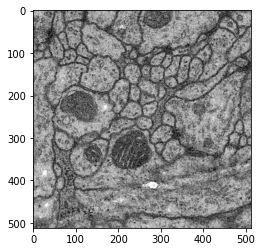

In [ ]:
I = 10 # номер изображения для вывода
plt.imshow(X_train[I], cmap='gray') # вывод изображения на экран


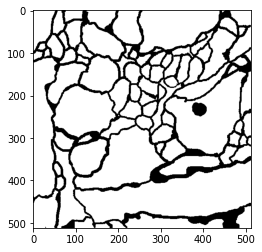

In [ ]:
I = 10 # номер изображения для вывода
plt.imshow(Y_train[I], cmap='gray') # вывод изображения на экран


In [ ]:
X_train_pred = np.array(X_train).reshape([30, 512, 512, 1])/255
Y_train_pred = np.array(Y_train).reshape([30, 512, 512, 1])/255

X_test_pred = np.array(X_test).reshape([30, 512, 512, 1])/255
Y_test_pred = np.array(Y_test).reshape([30, 512, 512, 1])/255



In [ ]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam

units = 64
kernel_size = 5
model = Sequential()
model.add(Conv2D(units, kernel_size, input_shape=[512, 512, 1], activation = 'relu', padding = 'same'))
model.add(Conv2D(units, kernel_size, activation = 'relu', padding = 'same'))
model.add(Conv2D(units, kernel_size, activation = 'relu', padding = 'same'))
model.add(Conv2D(units, kernel_size, activation = 'relu', padding = 'same'))
model.add(Conv2D(units, kernel_size, activation = 'relu', padding = 'same'))
model.add(Conv2D(1, 1, activation = 'sigmoid'))

model.compile(optimizer = Adam(), metrics=['accuracy'], loss = 'mse')


In [ ]:
model.fit(X_train_pred, Y_train_pred, epochs = 5 ,batch_size=20)

Epoch 1/5
2/2 [==============================] - 6s 2s/step - loss: 0.2333 - accuracy: 0.4036
Epoch 2/5
2/2 [==============================] - 5s 2s/step - loss: 0.1769 - accuracy: 0.7804
Epoch 3/5
2/2 [==============================] - 5s 2s/step - loss: 0.1607 - accuracy: 0.7804
Epoch 4/5
2/2 [==============================] - 5s 2s/step - loss: 0.1602 - accuracy: 0.7804
Epoch 5/5
2/2 [==============================] - 5s 2s/step - loss: 0.1556 - accuracy: 0.7804


In [ ]:
scores = model.evaluate(X_test_pred, Y_test_pred)
print(scores)


1/1 [==============================] - 1s 943ms/step - loss: 0.1153 - accuracy: 0.7476
[0.11529744416475296, 0.7475944757461548]


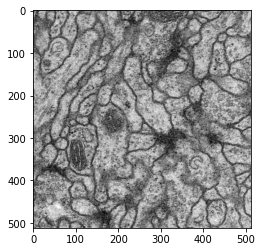

In [ ]:
I = 3
plt.imshow(X_test_pred[I].reshape([512, 512]), cmap='gray')

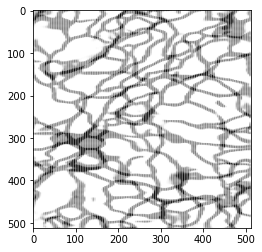

In [ ]:
plt.imshow(Y_test_pred[I].reshape([512, 512]), cmap='gray')
